# Technique d'apprentissage

### Visualisation des données

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from models.logistic_reg import Logistic
from models.adaboost import Adaboost
from models.mlp import Mlp
from models.svm import Svm
from models.decision_tree import Forest
from models.model_mixture import ModelMixture
import pandas as pd
from utils import plot_learning_curve
import warnings
from get_data.get_dataset import training_set, test_set
warnings.filterwarnings('ignore')

%matplotlib inline

### Visualisation du jeu de données
On choisit de mélanger nos données et d'afficher les 10 premières lignes du jeu d'entraînement.

In [2]:
training_set = training_set.sample(frac=1).reset_index(drop=True)
training_set.head(10)

,contrast_0,contrast_45,contrast_90,contrast_135,correlation_0,correlation_45,correlation_90,correlation_135,energy_0,energy_45,...,std3HF_D,std2HF_H,std2HF_V,mean2HF_D,std2HF_D,std1HF_H,std1HF_V,mean1HF_D,std1HF_D,class
0,1.624405,1.284794,1.034431,1.441858,-0.455309,-0.367395,-0.421914,-0.509589,2.549076,2.544760,...,1.220975,0.576477,1.547970,0.677463,1.888352,0.699242,1.080654,-0.318530,1.494096,0.0
1,-0.299070,-0.309469,-0.535831,-0.465548,0.313595,0.323482,0.566198,0.497768,-0.699648,-0.724018,...,-0.407130,-0.480118,1.674148,1.062486,-0.519536,-0.510284,1.806976,-1.101903,-0.607518,1.0
2,0.436852,0.927950,1.091772,0.719999,0.568852,0.091034,-0.328948,0.255049,0.816228,0.831530,...,0.554416,1.582477,1.142596,-0.392417,0.290478,1.354468,-0.125492,-0.116847,0.482412,0.0
3,0.956887,1.032650,0.715607,0.774783,0.134162,-0.061781,-0.051968,0.146776,1.141066,1.152827,...,0.594632,0.594939,0.663515,-0.406476,0.638023,0.687993,0.154810,0.081314,0.724029,0.0
4,-0.471993,1.097404,2.429826,1.569680,1.513248,0.408829,-0.963205,0.068127,1.219659,1.167567,...,-1.030370,1.781869,0.421899,1.106201,-0.883198,0.828684,-0.576629,0.187136,-0.916740,1.0
5,0.053118,-0.322106,-0.199341,0.073688,-0.823552,-0.362233,-0.405608,-0.896204,-0.639424,-0.663597,...,-0.320844,-0.277332,-0.586010,0.178333,0.221352,-0.258127,0.041630,0.894564,0.144510,1.0
6,-2.290011,-1.904336,-1.291167,-1.890214,0.859629,0.565147,0.114009,0.556274,-0.604700,-0.652763,...,-1.784419,-1.251669,-2.531798,0.374357,-1.911068,-1.498763,-2.428840,-0.992774,-2.150223,1.0
7,-0.766923,-0.915927,-1.096129,-1.006825,-0.382362,-0.045788,0.646728,0.105839,-0.569910,-0.605691,...,-1.340982,-0.620865,-1.251354,-0.603742,-1.358011,-0.143517,-0.053963,0.437556,-0.904153,1.0
8,0.452832,0.251047,0.001537,0.210672,0.738464,0.818903,0.764064,0.846832,0.594232,0.604197,...,0.726481,0.440064,-0.036098,0.610703,0.296313,0.636657,-0.464318,0.805340,0.342645,1.0
9,0.427973,0.860190,0.905212,0.637830,0.559334,0.131924,-0.178507,0.307684,0.438501,0.454010,...,0.014225,1.241559,0.732583,0.044369,0.291225,1.346897,0.154693,1.281273,0.318046,0.0


On sépare nos données en jeu de test et d'entraînement.

In [3]:
x_train = training_set.loc[:, training_set.columns != 'class'].to_numpy()
y_train = np.squeeze(training_set.loc[:, training_set.columns == 'class'].to_numpy())
x_test = test_set.loc[:, test_set.columns != 'class'].to_numpy()
y_test = np.squeeze(test_set.loc[:, test_set.columns == 'class'].to_numpy())

# Logistic classifier

In [4]:
log = Logistic(hyperparams=[0.01, 0.001])

#### Cross-Validation: 

In [5]:
log.train(x_train, y_train, tuning=True)
print(log)

Tuple testé: [0.0001, 0.1]
Error moyenne:  6.524733127425046
Tuple meilleur! On change pour:[0.0001, 0.1] et une erreur moyenne de 6.524733127425046
Tuple testé: [0.001, 0.1]
Error moyenne:  4.741675218195105
Tuple meilleur! On change pour:[0.001, 0.1] et une erreur moyenne de 4.741675218195105
Tuple testé: [0.01, 0.1]
Error moyenne:  4.543599155982484
Tuple meilleur! On change pour:[0.01, 0.1] et une erreur moyenne de 4.543599155982484
Tuple testé: [0.1, 0.1]
Error moyenne:  4.609640410269944
Tuple testé: [0.0001, 0.2]
Error moyenne:  6.868139699611538
Tuple testé: [0.001, 0.2]
Error moyenne:  4.834133891517736
Tuple testé: [0.01, 0.2]
Error moyenne:  4.939853714495342
Tuple testé: [0.1, 0.2]
Error moyenne:  5.349303681383065
Tuple testé: [0.0001, 0.5]
Error moyenne:  7.211549023758593
Tuple testé: [0.001, 0.5]
Error moyenne:  4.8737730154398164
Tuple testé: [0.01, 0.5]
Error moyenne:  5.322891766269018
Tuple testé: [0.1, 0.5]
Error moyenne:  5.9304755865411805
Tuple testé: [0.0001, 1

#### Performance du modèle:
La métrique utilisé ci-dessous sera réutilisée à l'identique pour l'ensemble des solutions testées dans ce notebook.

On affiche les courbes d'apprentissages pour différentes tailles de sous-ensembles d'entraînement. A chaque entraînement on récupère aussi une précision moyenne sur une 5-fold cross-validation.
Cette première courbe permet de vérifier la robustesse du modèle vis-à-vis de tailles d'ensembles d'entraînements différents.
De plus on affiche l'adaptibilité du modèle. C'est à dire le temps d'inférence pour un nombre de données fixé.
Pour finir on affiche la performance du modèle en fonction du temps d'entraînement.

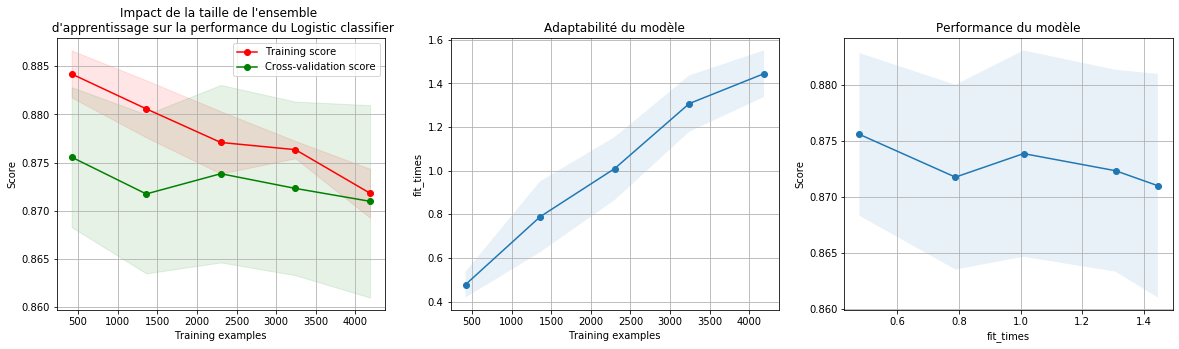

In [6]:
log.reinit()
plot_learning_curve(log.logistic_classifier, "Logistic classifier",x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

#### Matrice de confusion avec les meilleurs paramètres:

On affiche ici la matrice de confusion, c'est à dire le taux de vrai positifs, faux positifs, faux négatifs, vrai négatifs.
On affiche aussi la justesse c'est à dire le nombre total de données bien classées sur notre ensemble de test.

In [7]:
log.train(x_train, y_train, tuning=False)
justesse_log, confusion_matrix = log.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7067307692307693%


,Prédit normal,Prédit malade
0,0.129808,0.245192
1,0.048077,0.576923


### Courbes ROC et précision-rappel:
Pour rappel: 
- La ROC correspond aux taux de vrais positifs (pneumonie bien détectée) en fonction du taux de faux positifs (taux de (patient)normaux détectés comme ayant une pneumonie)
- La précision-rappel correspond à la précision (nombre de pneumonies détectées par rapport aux nombre de pneumonies réelles détectées + nombre de pneumonies fausses détectées (i.e le nombre de pneumonies bien detectées par rapport à tout ce que le modèle a detecté) en fonction du rappel (ou sensibilité: nombre de pneumonies détectées sur le nombre de pneumonies réelles détectées + les pneumonies réelles non détectées)

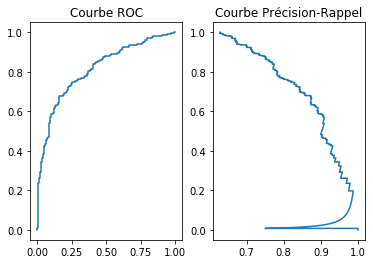

In [8]:
roc_log, pres_rec_log = log.get_curves(x_test, y_test)

# Adaboost:

In [9]:
ada = Adaboost([0.1])

In [10]:
# Cross-validation !!!!
ada.train(x_train, y_train, tuning=True)
print(ada)

Tuple testé: [1]
Error moyenne:  0.10286806883365203
Tuple meilleur! On change pour:[1] et une erreur moyenne de 0.10286806883365203
Tuple testé: [0.1]
Error moyenne:  0.12772466539196942
Tuple testé: [0.001]
Error moyenne:  0.16214149139579348
Tuple testé: [0.0001]
Error moyenne:  0.16290630975143403
Estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Les hyperamètres sont: 
lr:1



In [11]:
ada.train(x_train, y_train, tuning=False)
justesse_ada, confusion_matrix = ada.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.719551282051282%


,Prédit normal,Prédit malade
0,0.149038,0.225962
1,0.054487,0.570513


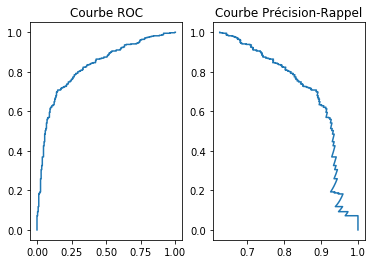

In [12]:
roc_ada, pres_rec_ada = ada.get_curves(x_test, y_test)

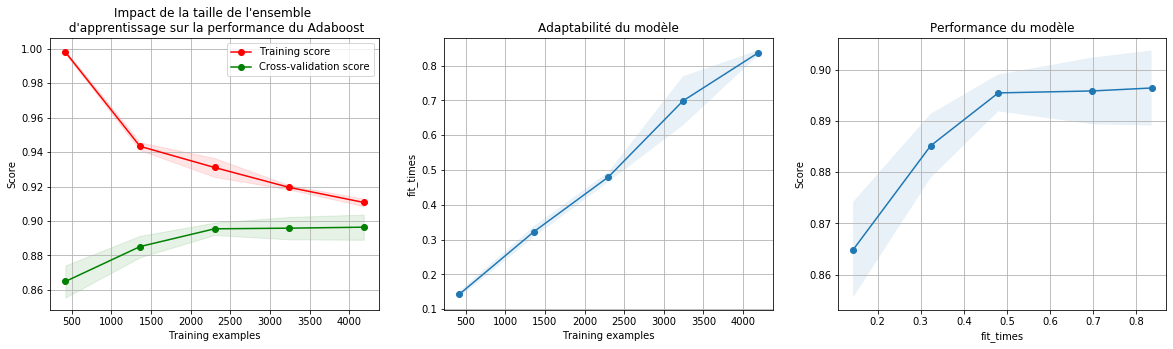

In [13]:
ada.reinit()
plot_learning_curve(ada.adaboost_classifier, "Adaboost",
                    x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

# Multi-Layer Perceptron

In [14]:
mlp = Mlp([10, 0.1, 0.1])

In [15]:
# Cross-validation !!!!
mlp.train(x_train, y_train, tuning=True)
print(mlp)

Tuple testé: [2, 0.9, 0.001]
Error moyenne:  27.70373437733863
Tuple meilleur! On change pour:[2, 0.9, 0.001] et une erreur moyenne de 27.70373437733863
Tuple testé: [10, 0.9, 0.001]
Error moyenne:  14.561836662998147
Tuple meilleur! On change pour:[10, 0.9, 0.001] et une erreur moyenne de 14.561836662998147
Tuple testé: [30, 0.9, 0.001]
Error moyenne:  8.948442420287142
Tuple meilleur! On change pour:[30, 0.9, 0.001] et une erreur moyenne de 8.948442420287142
Tuple testé: [60, 0.9, 0.001]
Error moyenne:  6.174759428390707
Tuple meilleur! On change pour:[60, 0.9, 0.001] et une erreur moyenne de 6.174759428390707
Tuple testé: [100, 0.9, 0.001]
Error moyenne:  5.5143644674863825
Tuple meilleur! On change pour:[100, 0.9, 0.001] et une erreur moyenne de 5.5143644674863825
Tuple testé: [2, 0.7, 0.001]
Error moyenne:  18.028955118213364
Tuple testé: [10, 0.7, 0.001]
Error moyenne:  10.071079530760807
Tuple testé: [30, 0.7, 0.001]
Error moyenne:  6.637029097565676
Tuple testé: [60, 0.7, 0.001

In [16]:
justesse_mlp, confusion_matrix = mlp.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7403846153846154%


,Prédit normal,Prédit malade
0,0.193910,0.181090
1,0.078526,0.546474


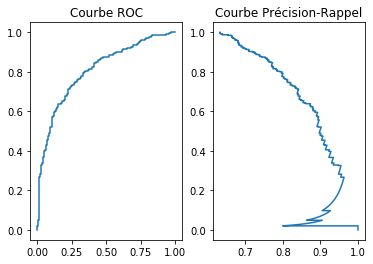

In [17]:
roc_mlp, pres_rec_mlp = mlp.get_curves(x_test, y_test)

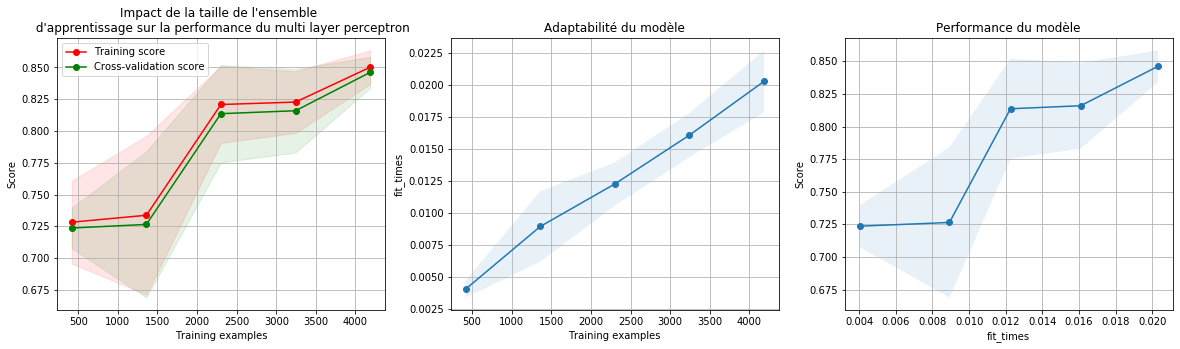

In [18]:
mlp.reinit()
plot_learning_curve(mlp.mlp, "multi layer perceptron",
                    x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

# SVM

In [19]:
svmrbf = Svm('rbf', ['gamma', 'régularisation'],[100,0.0001])
svmlinear = Svm('linear', ['None'],[])
svmpolynomial = Svm('poly', ['degree'],[1])

In [20]:
svmrbf.train(x_train, y_train, tuning=True)
svmlinear.train(x_train, y_train, tuning=True)
svmpolynomial.train(x_train, y_train, tuning=True)
print(svmrbf)

print(svmpolynomial)


Tuple testé: [1, 0.001]
Error moyenne:  0.375717017208413
Tuple meilleur! On change pour:[1, 0.001] et une erreur moyenne de 0.375717017208413
Tuple testé: [10, 0.001]
Error moyenne:  0.3193116634799235
Tuple meilleur! On change pour:[10, 0.001] et une erreur moyenne de 0.3193116634799235
Tuple testé: [100, 0.001]
Error moyenne:  0.3422562141491396
Tuple testé: [1000, 0.001]
Error moyenne:  0.33460803059273425
Tuple testé: [1, 0.0001]
Error moyenne:  0.4005736137667304
Tuple testé: [10, 0.0001]
Error moyenne:  0.3632887189292543
Tuple testé: [100, 0.0001]
Error moyenne:  0.3508604206500956
Tuple testé: [1000, 0.0001]
Error moyenne:  0.36233269598470363
Tuple testé: [1]
Error moyenne:  0.33747609942638623
Tuple meilleur! On change pour:[1] et une erreur moyenne de 0.33747609942638623
Tuple testé: [2]
Error moyenne:  0.38432122370936905
Tuple testé: [3]
Error moyenne:  0.34321223709369025
Tuple testé: [4]
Error moyenne:  0.4005736137667304
Tuple testé: [5]
Error moyenne:  0.4139579349904

In [21]:
justesse_svmrbf, confusion_matrix = svmrbf.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
print(confusion_matrix.head())

justesse_linear, confusion_matrix = svmlinear.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
print(confusion_matrix.head())

justesse_svmpoly, confusion_matrix = svmpolynomial.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
print(confusion_matrix.head())

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7163461538461539%
   Prédit normal  Prédit malade
0       0.145833       0.229167
1       0.054487       0.570513
Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7147435897435898%
   Prédit normal  Prédit malade
0       0.141026       0.233974
1       0.051282       0.573718
Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7131410256410257%
   Prédit normal  Prédit malade
0       0.144231       0.230769
1       0.056090       0.568910


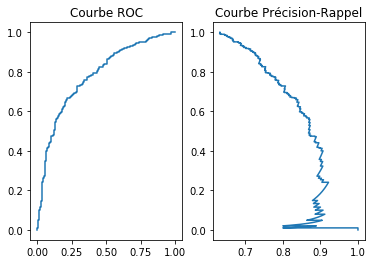

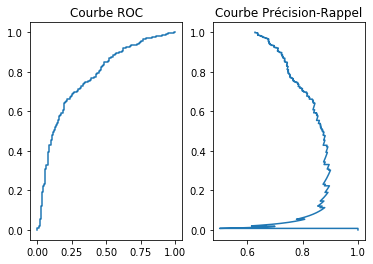

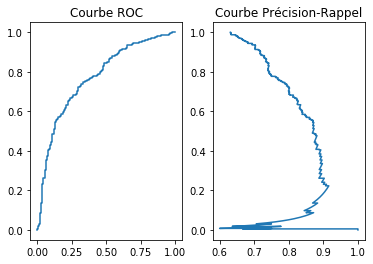

In [22]:
roc_svmrbf, pres_rec_svmrbf = svmrbf.get_curves(x_test, y_test)
roc_svmlinear, pres_rec_svmlinear = svmlinear.get_curves(x_test, y_test)
roc_poly, pres_rec_poly = svmpolynomial.get_curves(x_test, y_test)

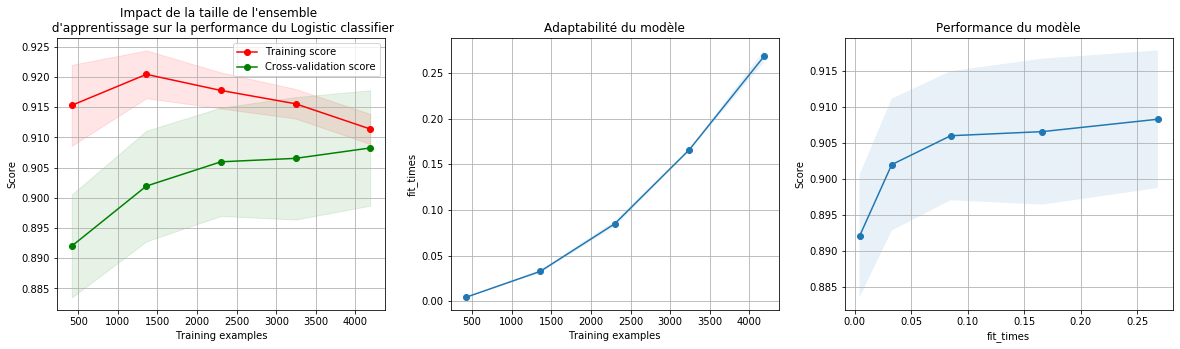

In [23]:
svmrbf.reinit()
plot_learning_curve(svmrbf.model, "Logistic classifier",x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

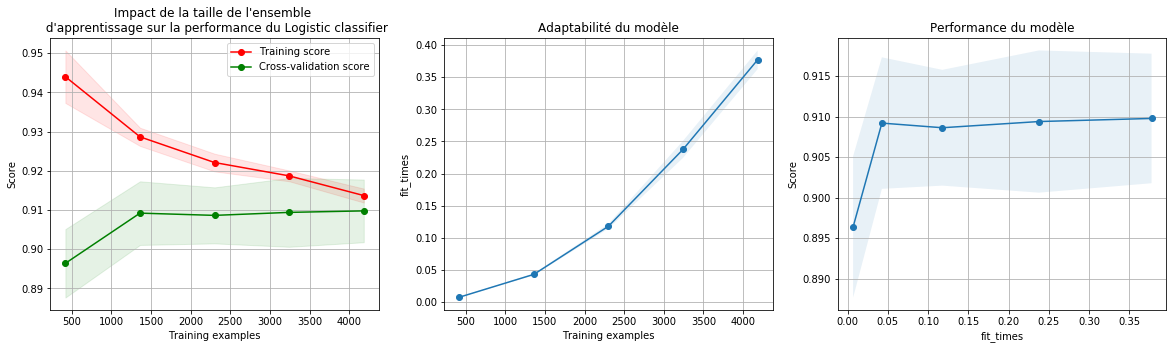

In [24]:
svmlinear.reinit()
plot_learning_curve(svmlinear.model, "Logistic classifier",x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

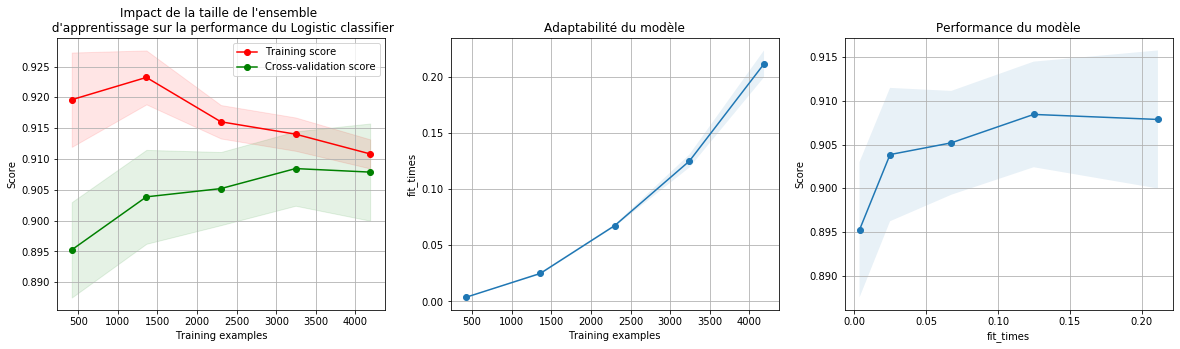

In [25]:
svmpolynomial.reinit()
plot_learning_curve(svmpolynomial.model, "Logistic classifier",x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

# Decision Tree

In [26]:
# ['max_depth', 'min_samples_leaf,min_samples_split,n_estimators']
forest = Forest([10, 3, 5, 200])

In [27]:
forest.train(x_train, y_train, tuning=True)
print(forest)


Tuple testé: [10, 2, 2, 200]
Error moyenne:  0.11663479923518164
Tuple meilleur! On change pour:[10, 2, 2, 200] et une erreur moyenne de 0.11663479923518164
Tuple testé: [20, 2, 2, 200]
Error moyenne:  0.09082217973231357
Tuple meilleur! On change pour:[20, 2, 2, 200] et une erreur moyenne de 0.09082217973231357
Tuple testé: [10, 3, 2, 200]
Error moyenne:  0.08795411089866156
Tuple meilleur! On change pour:[10, 3, 2, 200] et une erreur moyenne de 0.08795411089866156
Tuple testé: [20, 3, 2, 200]
Error moyenne:  0.0869980879541109
Tuple meilleur! On change pour:[20, 3, 2, 200] et une erreur moyenne de 0.0869980879541109
Tuple testé: [10, 2, 5, 200]
Error moyenne:  0.09369024856596558
Tuple testé: [20, 2, 5, 200]
Error moyenne:  0.08891013384321224
Tuple testé: [10, 3, 5, 200]
Error moyenne:  0.08891013384321224
Tuple testé: [20, 3, 5, 200]
Error moyenne:  0.09273422562141492
Tuple testé: [10, 2, 2, 400]
Error moyenne:  0.09751434034416825
Tuple testé: [20, 2, 2, 400]
Error moyenne:  0.08

In [28]:
justesse_forest, confusion_matrix = forest.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
print(confusion_matrix.head())

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7628205128205128%
   Prédit normal  Prédit malade
0       0.174679       0.200321
1       0.036859       0.588141


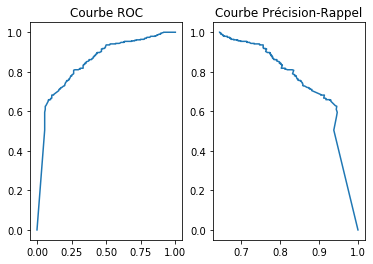

In [29]:
roc_forest, pres_rec_forest = forest.get_curves(x_test, y_test)

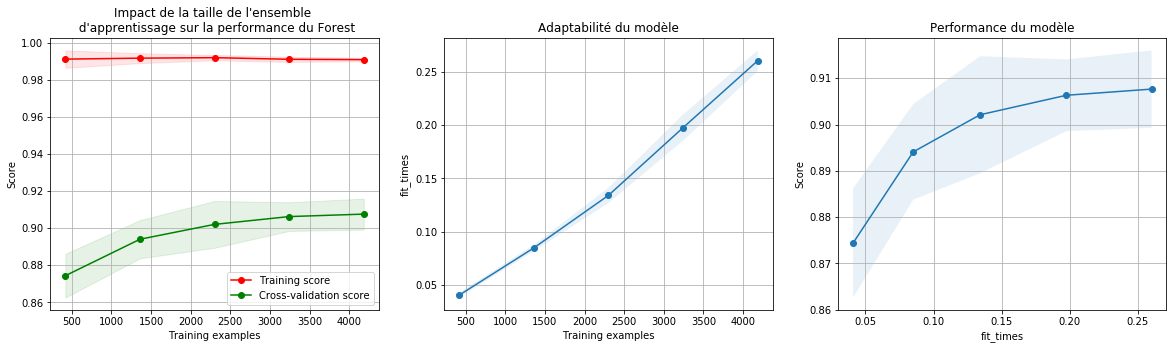

In [30]:
forest.reinit()
plot_learning_curve(forest.forest, "Forest",
                    x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

# Model Mixture

In [31]:
 mix = ModelMixture('None',hyperparams=[])

In [32]:
mix.train(x_train,y_train)
print("finish")

finish


In [33]:
justesse_mix, confusion_matrix = mix.get_confusion_matrix(x_test, y_test)
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
print(confusion_matrix.head())

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
(624, 7)
Justesse: 0.7115384615384616%
   Prédit normal  Prédit malade
0       0.137821       0.237179
1       0.051282       0.573718


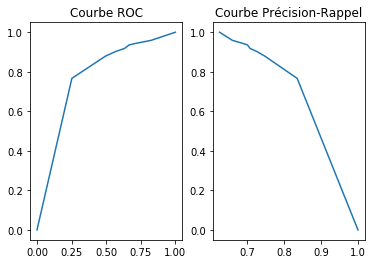

In [34]:
roc_mix, pres_rec_mix = mix.get_curves(x_test, y_test)

# Resultats


On affiche pour finir l'ensemble des justesses des différents modèles et on voit que le multi layer perceptron a eu

In [35]:
juste = pd.DataFrame([justesse_log,justesse_ada,justesse_mlp,justesse_linear,justesse_svmpoly,justesse_forest,justesse_svmrbf,justesse_mix]).T
juste.columns = ['log','ada','mlp','svm linear', 'svm poly', 'foret', 'svm rbf', 'mix']
juste.head()

,log,ada,mlp,svm linear,svm poly,foret,svm rbf,mix
0,0.706731,0.719551,0.740385,0.714744,0.713141,0.762821,0.716346,0.711538


On affiche les courbes ROC et précision-rappel dans l'ensemble des modèles: 

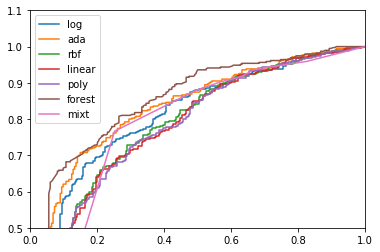

In [49]:
plt.xlim(0, 1)
plt.ylim(0.5, 1.1)
plt.plot(roc_log[0], roc_log[1], label='log')
plt.plot(roc_ada[0], roc_ada[1], label='ada')
plt.plot(roc_svmrbf[0], roc_svmrbf[1], label='rbf')
plt.plot(roc_svmlinear[0], roc_svmlinear[1], label='linear')
plt.plot(roc_poly[0], roc_poly[1], label='poly')
plt.plot(roc_forest[0], roc_forest[1], label='forest')
plt.plot(roc_mix[0], roc_mix[1], label='mixt')
plt.legend(loc='best')
plt.show()

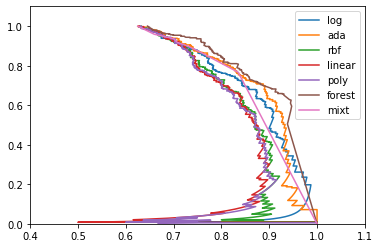

In [54]:
plt.xlim(0.4, 1.1)
plt.ylim(0, 1.1)
plt.plot(pres_rec_log[0], pres_rec_log[1], label='log')
plt.plot(pres_rec_ada[0], pres_rec_ada[1], label='ada')
plt.plot(pres_rec_svmrbf[0], pres_rec_svmrbf[1], label='rbf')
plt.plot(pres_rec_svmlinear[0], pres_rec_svmlinear[1], label='linear')
plt.plot(pres_rec_poly[0], pres_rec_poly[1], label='poly')
plt.plot(pres_rec_forest[0], pres_rec_forest[1], label='forest')
plt.plot(pres_rec_mix[0], pres_rec_mix[1], label='mixt')
plt.legend(loc='best')
plt.show()